In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# What impacts the revenue? ('gross')

In [2]:
df = pd.read_csv('movies.csv')
df.rename(columns={'gross':'revenue'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  revenue   7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [3]:
#Checking for missing data more closely

for col in df.columns:
    pct_missing = round((df[col].isnull().sum()/df[col].shape[0])*100)
    missing = np.sum(df[col].isnull())
    print('{} - {} - {}%'.format(col, missing, pct_missing))

name - 0 - 0.0%
rating - 77 - 1.0%
genre - 0 - 0.0%
year - 0 - 0.0%
released - 2 - 0.0%
score - 3 - 0.0%
votes - 3 - 0.0%
director - 0 - 0.0%
writer - 3 - 0.0%
star - 1 - 0.0%
country - 3 - 0.0%
budget - 2171 - 28.0%
revenue - 189 - 2.0%
company - 17 - 0.0%
runtime - 4 - 0.0%


> The 'Budget' column has too many missing values to replace them with the mean. We will restrict our dataframe to only include movies that have the budget. The new dataframe of reference will be 'df2'.

In [4]:
df2 = df.loc[df['budget'].isna()==False]
df2.shape

(5497, 15)

In [5]:
df2.isna().sum()

name         0
rating      20
genre        0
year         0
released     0
score        3
votes        3
director     0
writer       0
star         1
country      1
budget       0
revenue     61
company      6
runtime      2
dtype: int64

In [6]:
# Filling NaN in 'revenue' column

gross_mean = df2['revenue'].mean()
df2['revenue'].fillna(gross_mean, inplace=True)

<ipython-input-6-b20ed1a1542d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['revenue'].fillna(gross_mean, inplace=True)


In [7]:
#Checking for data types
df2.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
revenue     float64
company      object
runtime     float64
dtype: object

In [36]:
# fixing columns of interest
df2['revenue'] = df2['revenue'].astype('int64')
df2['budget'] = df2['budget'].astype('int64')
df2["year"] = pd.to_datetime(df2["year"], format='%Y')
df2.dtypes

<ipython-input-36-77cde94653ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['revenue'] = df2['revenue'].astype('int64')
<ipython-input-36-77cde94653ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['budget'] = df2['budget'].astype('int64')
<ipython-input-36-77cde94653ee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

name                object
rating              object
genre               object
year        datetime64[ns]
released            object
score              float64
votes              float64
director            object
writer              object
star                object
country             object
budget               int64
revenue              int64
company             object
runtime            float64
dtype: object

In [37]:
df2.sort_values(by=['revenue'], inplace=True, ascending=False)
# Drop duplicates
df2.drop_duplicates(inplace=True)
df2.head(5)

<ipython-input-37-c2e06cfb1c06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.sort_values(by=['revenue'], inplace=True, ascending=False)
<ipython-input-37-c2e06cfb1c06>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(inplace=True)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,revenue,company,runtime
5445,Avatar,PG-13,Action,2009-01-01,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019-01-01,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997-01-01,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015-01-01,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018-01-01,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


### Let's get an overview on the correlations for the numerical data in the dataset

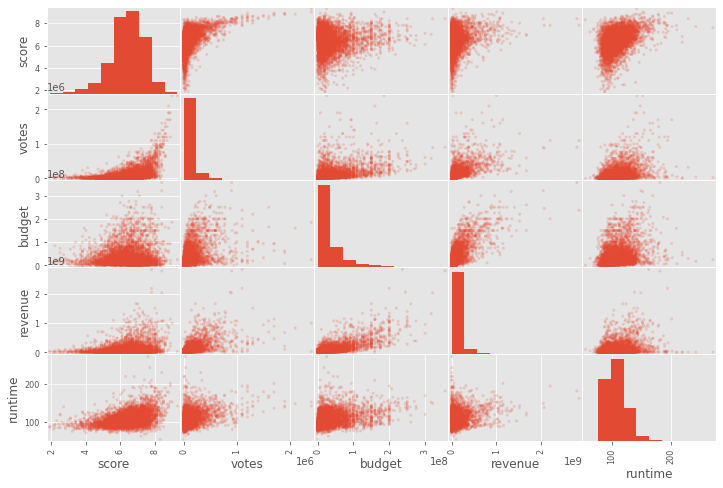

In [38]:
pd.plotting.scatter_matrix(df2, alpha=0.2);

In [39]:
correlation_matrix = df2.corr(method='pearson')
correlation_matrix

,score,votes,budget,revenue,runtime
score,1.000000,0.472140,0.076254,0.219684,0.416757
votes,0.472140,1.000000,0.442429,0.613781,0.352721
budget,0.076254,0.442429,1.000000,0.737880,0.320447
revenue,0.219684,0.613781,0.737880,1.000000,0.273382
runtime,0.416757,0.352721,0.320447,0.273382,1.000000


⚠️NOTE: The brighter the box, the higher the correlation.


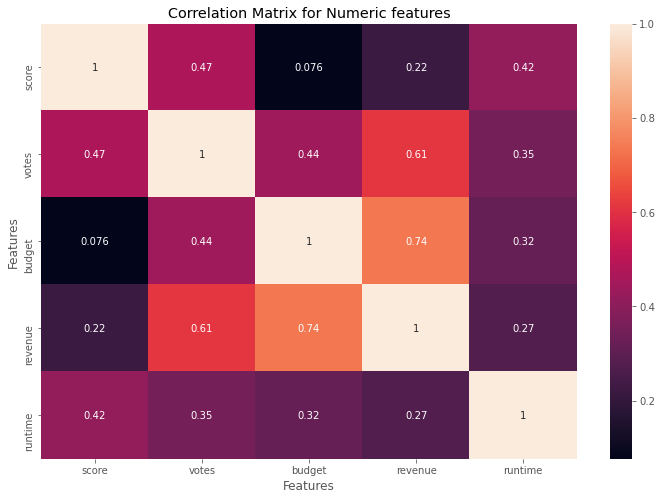

In [40]:
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Features')
plt.ylabel('Features')

print("⚠️NOTE: The brighter the box, the higher the correlation.")

> It looks like higher budgets for a movie result in both higher revenues and better votes. Let's dive deeper.

We will explore the following:

- 'Budget vs Gross Revenue'
- 'Budget vs Votes'

And then we will use a bubble chart to graphically assess the relationship between the three variables at once, depending on the movie genre.
- 'Budget vs Gross Revenue vs Votes'

### Budget vs Gross Revenue

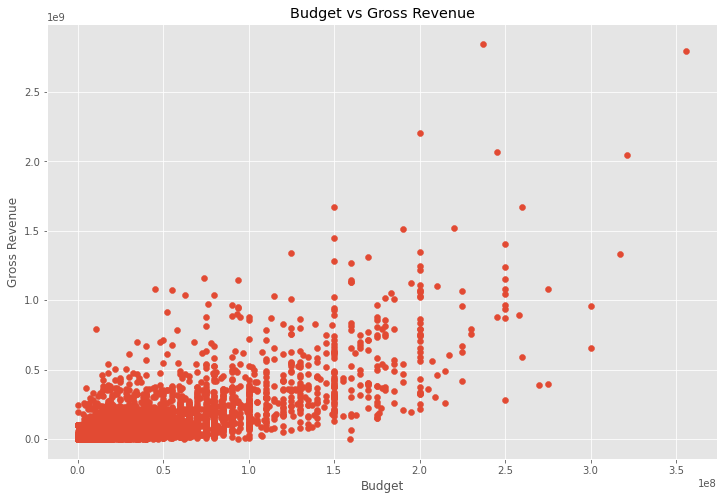

In [41]:
plt.scatter(x=df2['budget'], y=df2['revenue'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue');

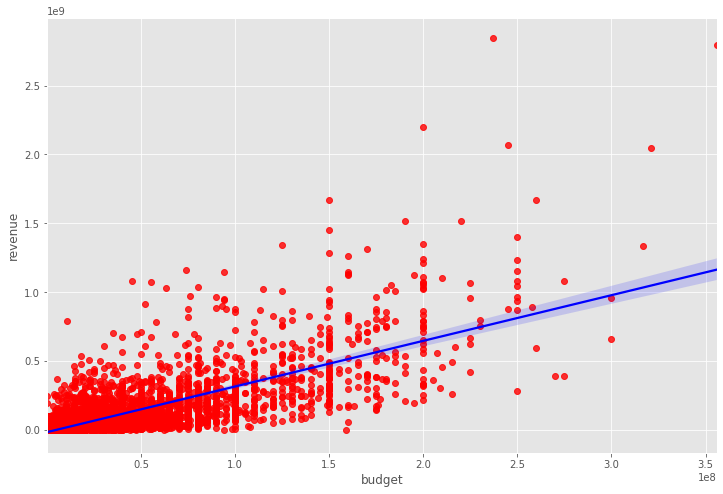

In [42]:
# Plot budget vs gross using seaborn
sns.regplot(x='budget', y='revenue',data=df2, scatter_kws={"color":"red"},line_kws={'color':"blue"})

### Budget vs Votes

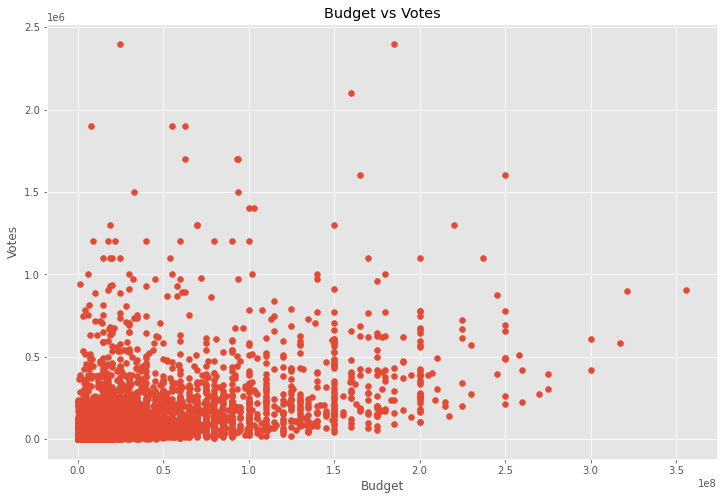

In [43]:
plt.scatter(x=df2['budget'], y=df2['votes'])
plt.title('Budget vs Votes')
plt.xlabel('Budget')
plt.ylabel('Votes');

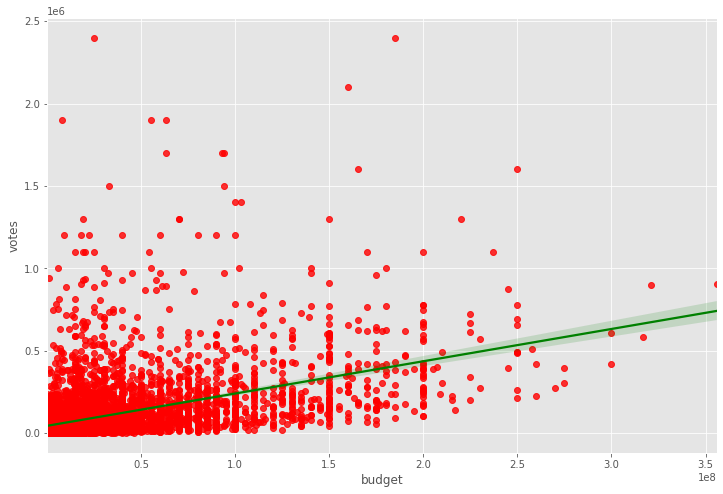

In [44]:
sns.regplot(x='budget', y='votes',data=df2, scatter_kws={"color":"red"},line_kws={'color':"green"})

### Let's look at how the three variables interplay, based on each genre, using the bubble chart

In [68]:
df2_restricted = df2[["genre", "budget", "revenue", "votes"]]

df2_grouped = df2_restricted.groupby('genre').mean()

for col in df2_grouped.columns:
    df2_grouped[col] = df2_grouped[col].astype('int64')
    
df2_grouped.head()

,budget,revenue,votes
genre,,,
Action,58084599,167358849,162168
Adventure,45708389,133084257,122542
Animation,75785197,279489785,147029
Biography,25312316,61605177,114682
Comedy,22607802,59574092,71362


In [81]:
import plotly.express as px
fig = px.scatter(df2_grouped, x="budget", y="votes", size="revenue", color=df2_grouped.index, hover_name=df2_grouped.index, log_x=True, size_max=60)
fig.show()

Well...the more money you pump into your movie, the higher the votes it receives! It may have have something to do with the amount of advertising involved.

In any case, the correlation between budget and revenue is also quite strong. It looks like as the budget increases, the size of the bubbles (that indicates the revenue) also tends to get bigger.

That is especially true for Action movies and Animation movies. No surprise there...they are my favorite genres!

In [82]:
df2_grouped.corr()

,budget,revenue,votes
budget,1.000000,0.685454,0.671962
revenue,0.685454,1.000000,0.503545
votes,0.671962,0.503545,1.000000


# Do adventure movies yield higher revenues than action movies on average?

I really like action movies, and I would like them to make more money than adventure movies do. Let's see if, on average, the revenue for action movies is grater than that for adventure movies.

> We will use bootstrapping to simulate 10000 samples of 1200 items from the df2 dataset. 
We will display the distribution of the sample mean in an histogram.

In [83]:
diff = []
for n in range(10000):
    bootstrap = df2.sample(1200, replace=True)
    revenue_action = round(bootstrap[bootstrap['genre']=='Action']['revenue'].mean())
    revenue_adventure = round(bootstrap[bootstrap['genre']=='Adventure']['revenue'].mean())
    diff.append(revenue_action - revenue_adventure)

ValueError: cannot convert float NaN to integer

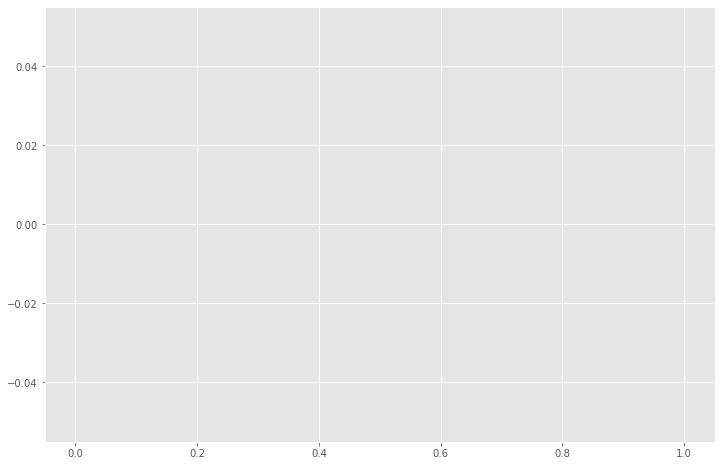

In [84]:
plt.hist(diff);

In [85]:
np.percentile(bootstrap['revenue'], 2.5), np.percentile(bootstrap['revenue'], 97.5), np.mean(diff)

/Users/nobi/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning:

Mean of empty slice.

/Users/nobi/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning:

invalid value encountered in double_scalars



(443844.25, 566652812.0, nan)

> We can be 95% confident that there is a difference in the average revenue for action movies and for adventure movies.

# What are the most profitable companies?

> Let's convert all non-numeric data to numeric data, and store that in a new dataframe, 'df_numerised'

In [86]:
df_numerised = df2

for col in df_numerised.columns:
    if(df_numerised[col].dtype == 'object'):
        df_numerised[col] = df_numerised[col].astype('category')
        df_numerised[col] = df_numerised[col].cat.codes

In [87]:
correlation_matrix_2 = df_numerised.corr(method='pearson')
correlation_matrix_2

,name,rating,genre,released,score,votes,director,writer,star,country,budget,revenue,company,runtime
name,1.000000,-0.029245,0.011330,-0.006156,0.016484,0.013367,0.012684,0.012405,-0.009579,-0.023947,0.024048,0.005933,0.020579,0.009540
rating,-0.029245,1.000000,0.117835,0.015003,0.057510,0.012007,0.011339,-0.005400,0.010604,0.025541,-0.175177,-0.163841,-0.069675,0.131894
genre,0.011330,0.117835,1.000000,0.027191,0.015220,-0.134915,-0.005854,0.020280,0.001083,-0.012592,-0.362484,-0.234563,-0.074120,-0.074953
released,-0.006156,0.015003,0.027191,1.000000,0.042161,0.027121,0.002480,0.009693,0.014830,-0.016324,0.016388,0.007926,-0.006735,0.005261
score,0.016484,0.057510,0.015220,0.042161,1.000000,0.472140,0.004781,0.013488,0.006519,-0.051130,0.076254,0.219684,0.023930,0.416757
votes,0.013367,0.012007,-0.134915,0.027121,0.472140,1.000000,-0.012027,-0.005681,-0.016622,0.042093,0.442429,0.613781,0.121501,0.352721
director,0.012684,0.011339,-0.005854,0.002480,0.004781,-0.012027,1.000000,0.263132,0.036332,0.010071,-0.011878,-0.029107,-0.008352,0.016920
writer,0.012405,-0.005400,0.020280,0.009693,0.013488,-0.005681,0.263132,1.000000,0.021947,0.022418,-0.039753,-0.035848,-0.001608,-0.018343
star,-0.009579,0.010604,0.001083,0.014830,0.006519,-0.016622,0.036332,0.021947,1.000000,-0.008956,-0.020181,0.000028,0.019419,0.014149
country,-0.023947,0.025541,-0.012592,-0.016324,-0.051130,0.042093,0.010071,0.022418,-0.008956,1.000000,0.054154,0.060705,0.048645,-0.036833


⚠️NOTE: The brighter the box, the higher the correlation.


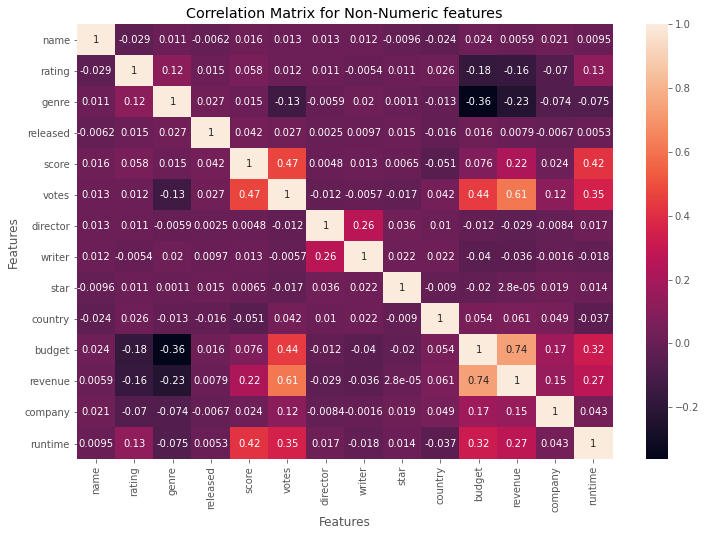

In [88]:
sns.heatmap(correlation_matrix_2, annot=True)

plt.title('Correlation Matrix for Non-Numeric features')
plt.xlabel('Features')
plt.ylabel('Features')

print("⚠️NOTE: The brighter the box, the higher the correlation.")

In [89]:
correlation_matrix_2 = df_numerised.corr(method='pearson')
corr_pairs = correlation_matrix_2.unstack()
corr_pairs

name     name        1.000000
         rating     -0.029245
         genre       0.011330
         released   -0.006156
         score       0.016484
                       ...   
runtime  country    -0.036833
         budget      0.320447
         revenue     0.273382
         company     0.042795
         runtime     1.000000
Length: 196, dtype: float64

In [90]:
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs)>0.5] 
high_corr


votes     revenue     0.613781
revenue   votes       0.613781
          budget      0.737880
budget    revenue     0.737880
name      name        1.000000
revenue   revenue     1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64